### SMS Spam Classification

### Importing Libraries

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Importing Dataset

In [103]:
spam_df=pd.read_csv('spam.csv',encoding="ISO-8859-1")
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [104]:
spam_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5454,ham,Im just wondering what your doing right now?,NaN,NaN,NaN
2707,spam,Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...,NaN,NaN,NaN
3359,ham,Please attend the phone:),NaN,NaN,NaN
207,ham,"Aight yo, dats straight dogg",NaN,NaN,NaN
5236,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,NaN,NaN,NaN


In [105]:
spam_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### EDA

In [106]:
spam_df.shape

(5572, 5)

In [107]:
spam_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [108]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [109]:
##Checking NaN values
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [110]:
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [111]:
## Checking duplicate values
spam_df[spam_df.duplicated()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
153,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
222,ham,"Sorry, I'll call later",NaN,NaN,NaN
325,ham,No calls..messages..missed calls,NaN,NaN,NaN
...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
5535,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN
5553,ham,Hahaha..use your brain dear,NaN,NaN,NaN


In [112]:
## Dropping Columns
spam_df.drop(labels=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [113]:
spam_df.sample(5)

,v1,v2
1057,ham,Ard 515 like dat. Y?
665,ham,En chikku nange bakra msg kalstiya..then had t...
3634,ham,It's not that you make me cry. It's just that ...
1768,ham,How. Its a little difficult but its a simple w...
3282,ham,Hey tmr maybe can meet you at yck


In [114]:
## Renaming columns
spam_df.rename(columns={'v1':'Target','v2':'SMS'},inplace=True)

In [115]:
spam_df.columns

Index(['Target', 'SMS'], dtype='object')

In [116]:
spam_df.describe()

,Target,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [117]:
spam_df.isnull().sum()

Target    0
SMS       0
dtype: int64

In [118]:
spam_df['Target'].unique()

array(['ham', 'spam'], dtype=object)

In [119]:
spam_df['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [120]:
## Checking duplicates
spam_df.duplicated().sum()

403

In [121]:
spam_df[spam_df.duplicated()]

,Target,SMS
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [122]:
## Dropping duplicate values
spam_df.drop_duplicates(keep='first',inplace=True)

In [123]:
spam_df.shape

(5169, 2)

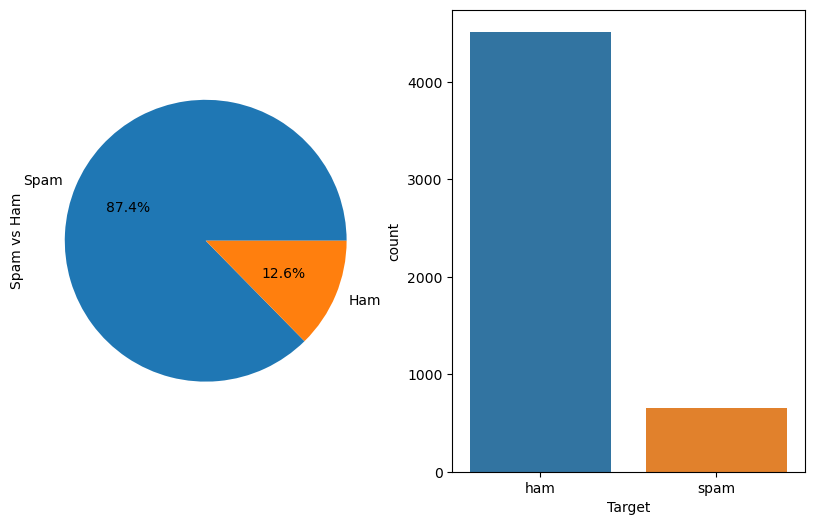

In [124]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
spam_df.Target.value_counts().plot(kind="pie",labels=["Spam", "Ham"],ylabel="Spam vs Ham",autopct='%1.1f%%');

plt.subplot(1, 2, 2)
sns.countplot(x="Target",data=spam_df)
plt.show()

In [125]:
## Encoding Target Column variables
le=LabelEncoder()
spam_df['Target']=le.fit_transform(spam_df['Target'])
spam_df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

### Model Training

In [126]:
## Segregating Independent and dependent columns
X = spam_df['SMS']
y = spam_df['Target']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [128]:
## Feature Extraction
cv = CountVectorizer()

In [129]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

#### Logistic Regression

In [130]:
 LR = LogisticRegression()

In [131]:
LR.fit(X_train_cv, y_train)

LogisticRegression()

In [132]:
y_pred=LR.predict(X_train_cv)

In [133]:
print('Train:',accuracy_score(y_train,y_pred)*100)

Train: 99.75816203143893


In [134]:
y_pred_test = LR.predict(X_test_cv)

In [135]:
print('Test:',accuracy_score(y_test,y_pred_test)*100)

Test: 97.87234042553192
